# Ch6. 트리 기반 기법

[6.1] 단순트리
의사결정 트리: 데이터셋을 동질적인 클러스터로 분할
: 외생변수 Y(ex. 실적), 특성 X(ex. 팩터) ~ 가능한 한 Y가 동질적인 그룹을 형성하도록, 특정 집합 X 내의 한 변수에 따라 분할이 이루어짐
- Y: 실수 = 회귀 트리, 번주형 = 분류 트리
1. 각각의 특성 $x^{(k)}_i$에 대해 클러스터: Y가 균일해지도록 하는 최적의 분할점 찾음
2. 가장 높은 수준의 동질성 달성하는 특성 선택
- 회귀 트리의 동질성 ~ 분산 => 각 클러스터 내부의 $y_i$가 유사하기를 원함: 각 클러스터 내부의 변화량(variability)/확산(dispersion) 최소화

(*) 각 특성에 대한 최적의 분할 찾기: $argmin_{c^{(k)}}V^{(k)}_I(c^{(k)})$
$V^{(k)}_I(c^{(k)})=\sum_{x^{(k)}_i<c^{(k)}}(y_i-m^{k,-}_I(c^{(k)}))^2+\sum_{x^{(k)}_i>c^{(k)}}(y_i-m^{k,+}_I(c^{(k)}))^2$
=> 첫 번째 클러스터의 총 확산 + 두 번째 클러스터의 총 확산
$m^{k,-}_I(c^{(k)})=\frac{1}{\#\{i,x_i^{(k)}<c^{(k)}\}} \sum_{\{x^{(k)}_i<c^{(k)}\}} y_i$

- 특성 k에 대한 최적 분할 $c^{k,*}=V^{(k)}_I(c^{(k)})$: 두 하위 그룹에 대한 총 확산이 가장 작은 분할
- 모든 분할뿐만 아니라 $k^*=argmin_k V_I^{(k)}(c^{k,*})와 같이 모든 변수에 대한 총 확산도 최소화 
- 한 번의 분할 수행된 후, 새로 형성된 2개의 클러스터에서 똑같은 절차 계속
- 트리 만들어지면(학습되면) 새로운 인스턴스에 대한 예측 쉽게 가능: 특성값 주어지면 인스턴스는 트리의 한 잎사귀에 속하게 됨
- 각 잎사귀에는 레이블의 평균값이 있음: 예측 결과

- 출력 $\overline{y}_i$: 레이블 범주의 개수만큼의 요소 가짐 -> 각 요소: 인스턴스가 해당 범주에 속할 확률
- 알고리즘은 순도(purity)를 추구함: 가능한 한 순수한 클러스터 ~ 매우 지배적인 클래스가 하나이거나 적어도 몇 개만 있는 클러스터로 이어지는 분할 기준 찾기
- J개의 클래스가 있는 경우 ~ 출력값에서 생성된 비율 $p_j$를 기반으로 하는 지표들 :
1. 지니 순도 지수: $1-\sum^J_{j=1}p^2_j$
- 지니 지수= 1 - (포트폴리오의 분산 정도를 측정하는 허핀달 지수)
2. 오분류 오차: $1-max_jp_j$
3. 엔트로피: -\sum^J_jlog(p_j)p_j$
- 새 인스턴스가 잎사귀에 연결될 때 가장 높은 비율(확률)을 가진 클래스를 선택함

[6.1.3] 가지치기의 기준
- 트리 만들 때 전체 트리가 성장할 때까지 분할 프로세스 진행될 수 있음: 
=> 모든 인스턴스가 개별적인 잎사귀에 속함
=> 모든 잎이 현재 특성 집합을 기반으로 더 이상 분리할 수 없는 인스턴스로 구성됨
--- 더이상 프로세스 진행 x
-> 완전히 자란 트리: 거의 완벽한 적합도 보이는 경우 있음
- but 트리에서 가장 신뢰할 수 있는 부분: 뿌리에서 가장 가까운 부분 ~ 데이터의 상당량을 포함하고 있기 때문
=> 1st 분할: 가장 일반적인 패턴 강조 ~ 가장 중요한 분할
- 트리 크기 제한 필수적:
1. 각 최종 노드에 최소 인스턴스 수 부과 
2. 각 틀러스터의 크기가 최소가 되도록
3. 분할이 손실을 충분히 줄이지 못하면 분할: 불필요 -> 분할 후 얻은 손실이 분할 전 손실의 $1-\epsilon$ 배보다 작은 경우에만 유효
4. 트리의 깊이 제한 ~ 깊이: 트리의 뿌리 & 모든 잎사귀 사이의 전체 최대 분할 수로 정의

Index(['stock_id', 'date', 'Advt_12M_Usd', 'Advt_3M_Usd', 'Advt_6M_Usd',
       'Asset_Turnover', 'Bb_Yld', 'Bv', 'Capex_Ps_Cf', 'Capex_Sales',
       'Cash_Div_Cf', 'Cash_Per_Share', 'Cf_Sales', 'Debtequity', 'Div_Yld',
       'Dps', 'Ebit_Bv', 'Ebit_Noa', 'Ebit_Oa', 'Ebit_Ta', 'Ebitda_Margin',
       'Eps', 'Eps_Basic', 'Eps_Basic_Gr', 'Eps_Contin_Oper', 'Eps_Dil', 'Ev',
       'Ev_Ebitda', 'Fa_Ci', 'Fcf', 'Fcf_Bv', 'Fcf_Ce', 'Fcf_Margin',
       'Fcf_Noa', 'Fcf_Oa', 'Fcf_Ta', 'Fcf_Tbv', 'Fcf_Toa', 'Fcf_Yld',
       'Free_Ps_Cf', 'Int_Rev', 'Interest_Expense', 'Mkt_Cap_12M_Usd',
       'Mkt_Cap_3M_Usd', 'Mkt_Cap_6M_Usd', 'Mom_11M_Usd', 'Mom_5M_Usd',
       'Mom_Sharp_11M_Usd', 'Mom_Sharp_5M_Usd', 'Nd_Ebitda', 'Net_Debt',
       'Net_Debt_Cf', 'Net_Margin', 'Netdebtyield', 'Ni', 'Ni_Avail_Margin',
       'Ni_Oa', 'Ni_Toa', 'Noa', 'Oa', 'Ocf', 'Ocf_Bv', 'Ocf_Ce', 'Ocf_Margin',
       'Ocf_Noa', 'Ocf_Oa', 'Ocf_Ta', 'Ocf_Tbv', 'Ocf_Toa', 'Op_Margin',
       'Op_Prt_Margin', 'Oper_Ps_Net_

<string>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


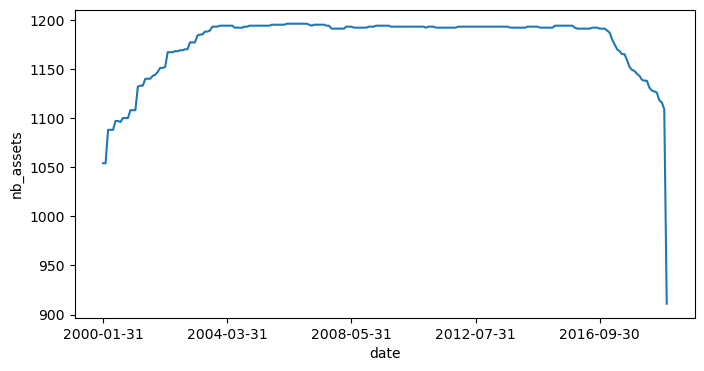

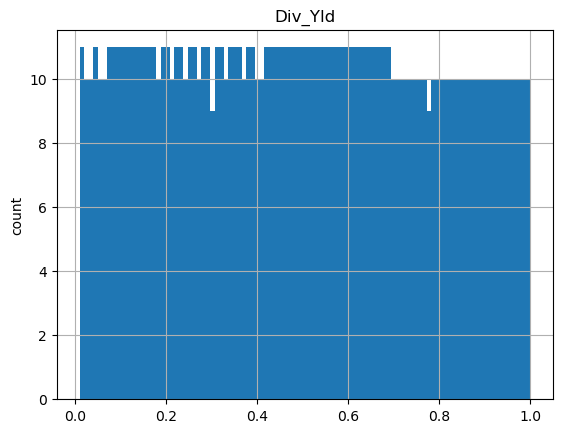

In [1]:
# 레이블: 향후 1개월 수익률
# 특성: 샘플에서 사용 가능한 모든 예측 인자
# 각 노드에서 조건은 Boolean 표현식으로 분할 설명 -> if True: 왼쪽 클러스터로 이동 o/w 오른쪽
from sklearn import tree # 트리 모듈
import import_ipynb
from Ch1 import data_ml

In [2]:
X=data_ml.iloc[:,3:95] # 특성/예측 인자
y=data_ml['R1M_Usd'] # 레이블/종속 변수

In [ ]:
fit_tree=tree.DecisionTreeRegressor( # 모델 정의
    min_samples_split=8000, # 분할 지속 위한 최소 관측치 개수
    max_depth=3, # 최대 깊이(: 트리 레벨) ~ 최대 3번의 분할이 있어야 함
    ccp_alpha=0.000001, # 복잡도 매개 변수: 분할 전의 0.9999배 이하로 손실 줄여야 함
    min_samples_leaf=3500 # 각 최종 노드에 필요한 관측치 최소 개수(나뭇잎)
)

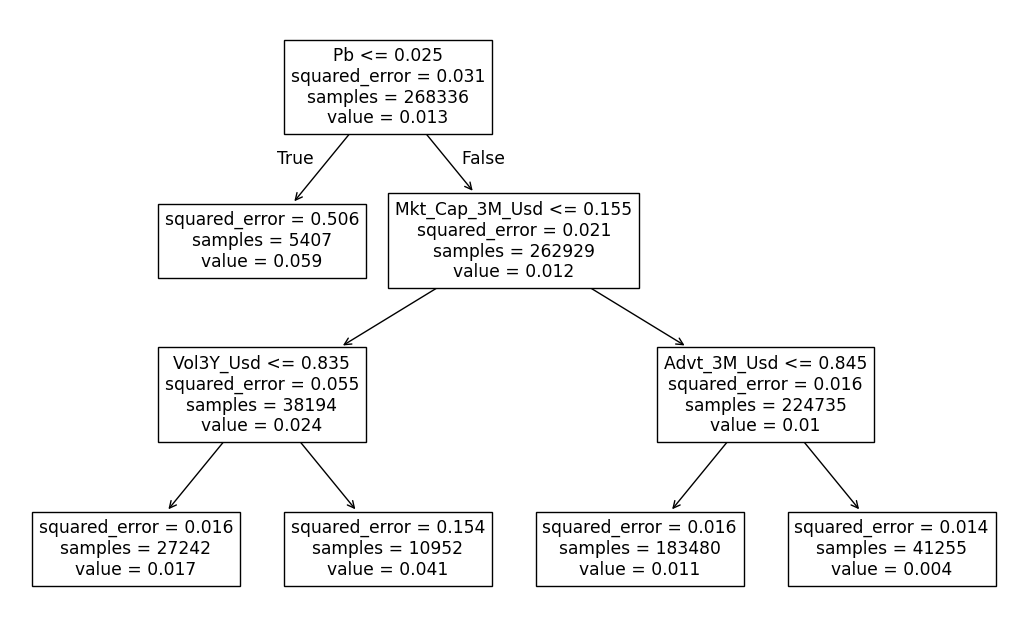

In [4]:
import matplotlib.pyplot as plt
fit_tree.fit(X,y) # 모델 피팅
fig, ax=plt.subplots(figsize=(13,8))
tree.plot_tree(fit_tree, feature_names=X.columns.values, ax=ax)
plt.show()

In [ ]:
# 모델이 학습을 마치면(: 트리가 성장하면) 인스턴스에 대한 예측: 인스턴스가 위치해야 하는 클러스터 내 레이블의 평균값(= value)
y_pred=fit_tree.predict(X.iloc[0:6,:])
print(f'y_pred: {y_pred}')

y_pred: [0.01088066 0.01088066 0.01088066 0.01088066 0.04133053 0.04133053]


<Figure size 18000x6000 with 0 Axes>

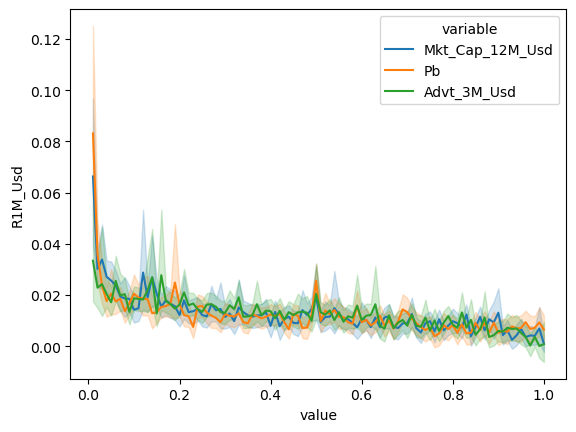

<Figure size 18000x6000 with 0 Axes>

In [ ]:
import pandas as pd
unpivoted_data_ml=pd.melt(
    data_ml[['R1M_Usd','Mkt_Cap_12M_Usd','Pb','Advt_3M_Usd']],
    id_vars='R1M_Usd'
) # 형태 바꿈
import seaborn as sns
sns.lineplot(data=unpivoted_data_ml, y='R1M_Usd', x='value', hue='variable')
plt.figure(figsize=(15,5),dpi=1200)

In [8]:
# 테스트셋에서 단일 트리의 예측 품질 평가
from Ch1 import features
from Ch5 import training_sample, testing_sample
y_train=training_sample['R1M_Usd'].values
X_train=training_sample[features].values

y_test=testing_sample['R1M_Usd'].values
X_test=testing_sample[features].values

fit_tree2=tree.DecisionTreeRegressor(
    min_samples_split=4000,
    max_depth=5,
    ccp_alpha=0.0001,
    min_samples_leaf=1500
)

In [10]:
fit_tree2=fit_tree2.fit(X_train, y_train) # 모델 피팅
import numpy as np
mse=np.mean((fit_tree2.predict(X_test)-y_test)**2)
print(f'MSE: {mse}')

MSE: 0.036996958091850024


In [11]:
# 적중률
hitratio=np.mean(fit_tree2.predict(X_test)*y_test>0)
print(f'Hit Ratio: {hitratio}')
# 벤치마크의 임계치: 최소 52%

Hit Ratio: 0.5460346399270738
